In [2]:
import xarray as xr
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

dirpath = '/home/ac63/storage/2021_06_23_Argo_SIC_SIT_only/'
float_names = ['5904183', '5095637', '5094858', '5094860', '5094180', '5094184', '5094768', '5094767']

f_4183 = xr.open_dataset(dirpath + '5904183.nc')
f_5637 = xr.open_dataset(dirpath + '5905637.nc')
f_4858 = xr.open_dataset(dirpath + '5904858.nc')
f_4860 = xr.open_dataset(dirpath + '5904860.nc')
f_4180 = xr.open_dataset(dirpath + '5904180.nc')
f_4184 = xr.open_dataset(dirpath + '5904184.nc')
#f_5372 = xr.open_dataset(dirpath + '5905372QC.nc')
f_4768 = xr.open_dataset(dirpath + '5904768.nc')
f_4767 = xr.open_dataset(dirpath + '5904767.nc')
floats = [f_4183, f_5637, f_4858, f_4860, f_4180, f_4184, f_4768, f_4767]


In [3]:
f_4767

<xarray.Dataset>
Dimensions:        (time: 144)
Coordinates:
    num_profs      int64 ...
    institution    object ...
  * time           (time) datetime64[ns] 2016-05-05T20:58:59 ... 2020-04-17T0...
    wmoid          int64 ...
Data variables:
    prof_nums      (time) int64 ...
    lat            (time) float64 ...
    lon            (time) float64 ...
    position_flag  (time) int64 ...
    pos_std        (time) float64 ...
    sic            (time) float64 ...
    sit            (time) float64 ...

In [4]:
print((f_4767.sic.v))

(229,)


In [5]:
print((f_4183.time.values.shape))

(229,)


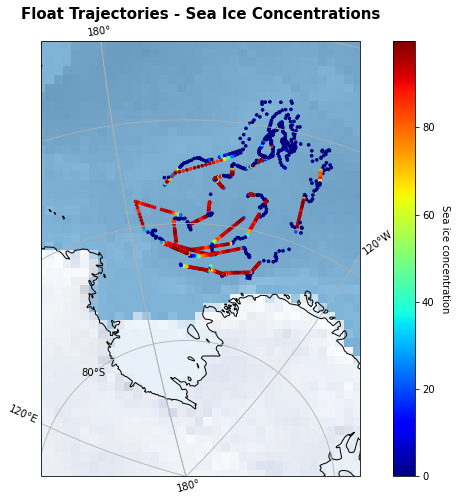

In [6]:
import cartopy.crs as ccrs
import cartopy
import pandas as pd

import matplotlib.cm as cm
#plt.scatter(x, y, c=t, cmap=cm.jet)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
ax.stock_img()
ax.coastlines()
ax.set_extent([170, 225, -90, -50])

for f in range(len(floats)): 
    lon = floats[f].lon.values
    lat = floats[f].lat.values
    sic = floats[f].sic.values
    ax.scatter(lon, lat, c=sic, cmap ='jet', s=7, transform=ccrs.PlateCarree())
map1 = ax.imshow(np.stack([sic, sic]),cmap='jet')
gridlines = ax.gridlines(draw_labels=True)
cbar = fig.colorbar(map1, ax=ax)
cbar.set_label('Sea ice concentration', rotation=270, labelpad=15)
plt.title('Float Trajectories - Sea Ice Concentrations', fontweight = 'bold', fontsize='15')
#plt.savefig('/home/ac63/projects/hmei/figures/SIC_Float_Trajectories.png')
plt.show()


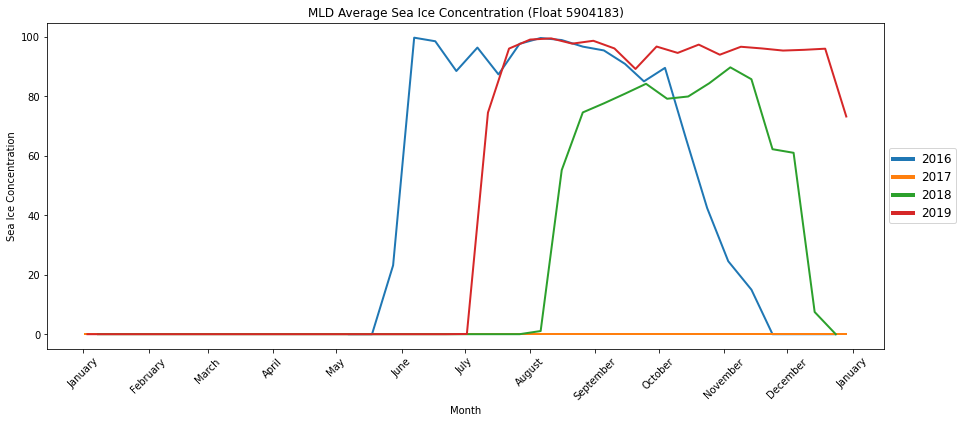

<xarray.DataArray 'dayofyear' (time: 0)>
array([], dtype=int64)
Coordinates:
    num_profs    int64 144
    institution  <U4 'AOML'
  * time         (time) datetime64[ns] 
    wmoid        int64 5904767


In [10]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,6))

dayofyear=f_4767.time.dt.dayofyear
dates = f_4767.time.values
dates = pd.to_datetime(dates).year    
yrs = range(min(dates), max(dates))
sic = f_4767.sic.values
#pos_flag = f_4183.position_flag.values
for yr in range(len(yrs)):
    ax.plot(dayofyear.values[dates==yrs[yr]], sic[dates==yrs[yr]], label = str(yrs[yr]), linewidth=2)

    date_form = DateFormatter("%B") # %m for month number
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    ax.set_xlabel('Month')
    ax.set_ylabel('Sea Ice Concentration')
    plt.title('MLD Average ' + 'Sea Ice Concentration' + ' (Float 5904183)')
    plt.setp(leg_lines, linewidth=4)
    plt.setp(leg_texts, fontsize='large')
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
      
plt.show()
(print(dayofyear[dates==2015]))